In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical, set_random_seed
print(tf.__version__)


2.18.0


In [41]:
import sklearn
from sklearn.model_selection import train_test_split
print(sklearn.__version__)

1.6.1


In [42]:
import matplotlib.pyplot as plt

In [43]:
tf.config.experimental.enable_op_determinism()

In [44]:
set_random_seed(42)

In [45]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [47]:
X_train.min(), X_train.max()

(np.uint8(0), np.uint8(255))

In [48]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [49]:
X_train.min(), X_train.max()

(np.float64(0.0), np.float64(1.0))

In [50]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [51]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [52]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [53]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

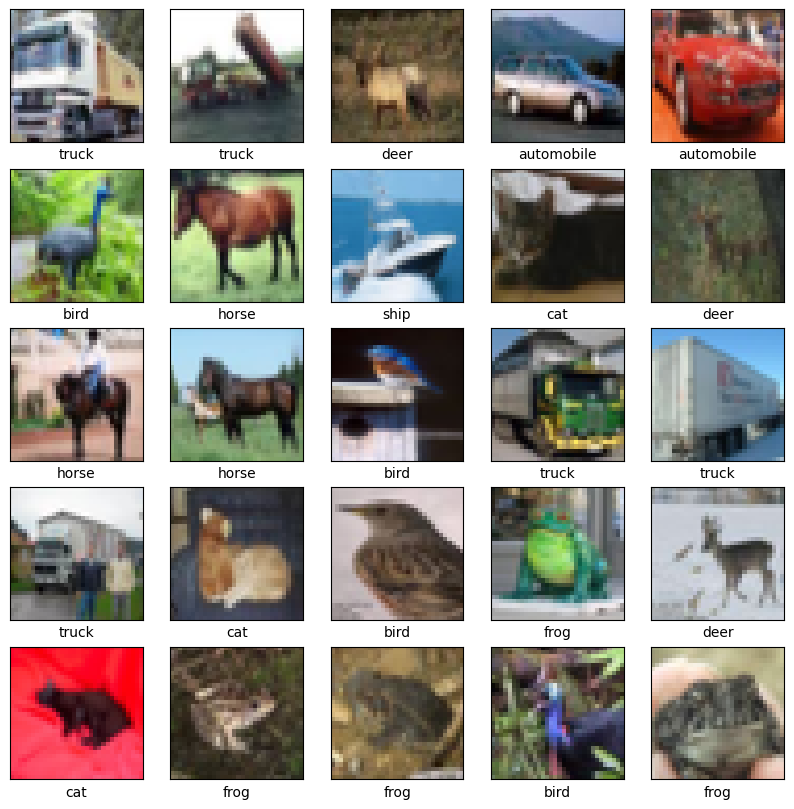

In [54]:
plt.figure(figsize=(10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i].argmax()])

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=42)

In [56]:
X_train.shape, y_train.shape, X_val.shape,y_val.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

In [57]:
model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2868 - loss: 1.9222 - val_accuracy: 0.5137 - val_loss: 1.3851
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4646 - loss: 1.4772 - val_accuracy: 0.5740 - val_loss: 1.2157
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5161 - loss: 1.3504 - val_accuracy: 0.5875 - val_loss: 1.1683
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5502 - loss: 1.2714 - val_accuracy: 0.6131 - val_loss: 1.0925
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5734 - loss: 1.2092 - val_accuracy: 0.6280 - val_loss: 1.0531
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5862 - loss: 1.1657 - val_accuracy: 0.6284 - val_loss: 1.0586
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5967 - loss: 1.1321 - val_accuracy: 0.6478 - val_loss: 1.0041
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6156 - loss: 1.0870 - 

In [60]:
model.save('cifar10_model.keras')

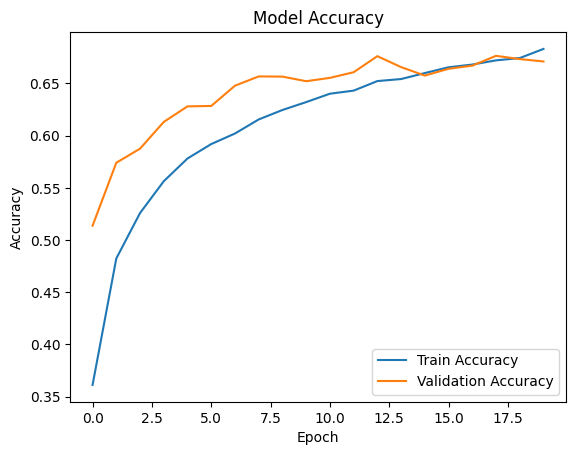

In [61]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [62]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6641 - loss: 0.9739


[0.9809050559997559, 0.6626999974250793]

In [63]:
predictions = model.predict(X_test[:10])
predictec_classes = predictions.argmax(axis=-1)
true_classes = y_test[:10].argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [64]:
predictec_classes

array([3, 8, 1, 8, 4, 6, 1, 6, 3, 1])

In [65]:
true_classes

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

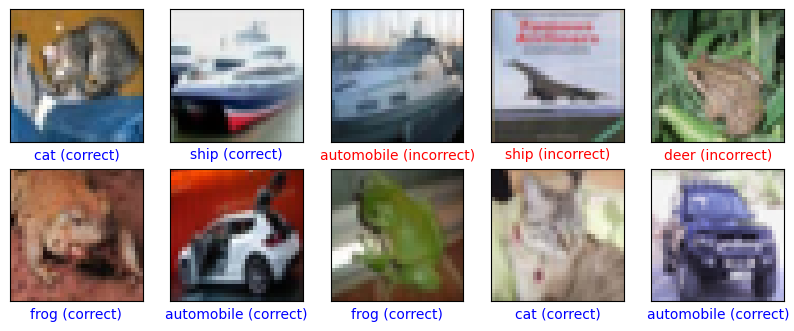

In [66]:
plt.figure(figsize=(10,10))
for i in range(1,11):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i - 1])
    color = 'blue' if predictec_classes[i -1] == true_classes[i -1] else 'red'
    plt.xlabel(f"{class_names[predictec_classes[i-1]]} ({'correct'if color == 'blue' else 'incorrect'})", color=color)
plt.show